In [ ]:
---
title: "에너지사용량 자료 분석"
author: "유재민"
format: dashboard
execute: 
  enabled: true
  cache: false
  freeze: false
  error: true
---

In [15]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio

In [16]:
pd.options.plotting.backend = "plotly"
pio.templates.default = "plotly_white"

In [17]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2023/main/posts/NYCTaxi.csv")
df_feature = df.assign(
    log_trip_duration = np.log(df.trip_duration),
    pickup_datetime = df.pickup_datetime.apply(pd.to_datetime),
    dropoff_datetime = df.dropoff_datetime.apply(pd.to_datetime),
    dist = np.sqrt((df.pickup_latitude-df.dropoff_latitude)**2 + (df.pickup_longitude-df.dropoff_longitude)**2),
    #---#
    vendor_id = df.vendor_id.map({1:'A',2:'B'})
).assign(
    speed = lambda df: df.dist / df.trip_duration,
    pickup_hour = lambda df: df.pickup_datetime.dt.hour,
    dropoff_hour = lambda df: df.dropoff_datetime.dt.hour,
    dayofweek = lambda df: df.pickup_datetime.dt.dayofweek
)

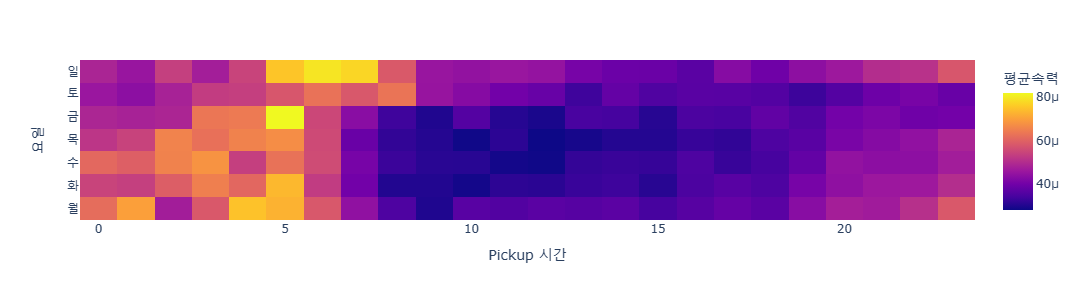

In [18]:
tidydata = df_feature.pivot_table(
    index = 'pickup_hour',
    columns = 'dayofweek',
    values = 'speed',
    aggfunc = 'mean'
).stack().reset_index().rename({0:'speed_mean'},axis=1)
dct1={0:'월',1:'화',2:'수',3:'목',4:'금',5:'토',6:'일'}
tidydata=tidydata.assign(dayofweek=tidydata.dayofweek.map(dct1))
fig=px.density_heatmap(
    data_frame=tidydata,
    x='pickup_hour',
    y='dayofweek',
    z='speed_mean',
    nbinsx=24,
    nbinsy=7,
    height=300
)

fig.update_layout(
    xaxis_title='Pickup 시간',
    yaxis_title='요일',
    coloraxis_colorbar_title='평균속력'
)

fig.show()

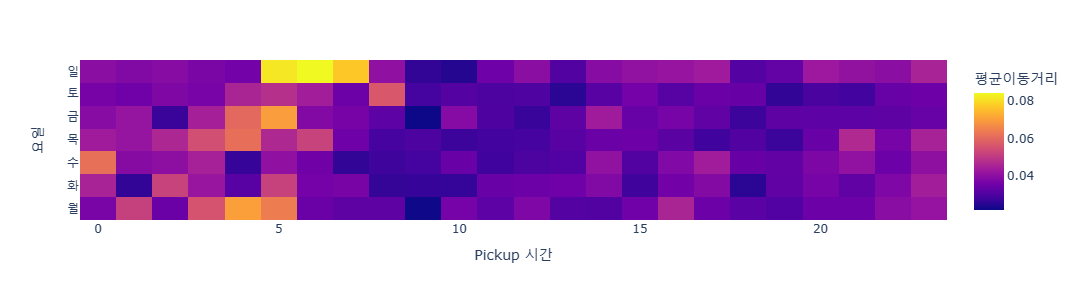

In [19]:
tidydata1 = df_feature.pivot_table(
    index = 'pickup_hour',
    columns = 'dayofweek',
    values = 'dist',
    aggfunc = 'mean'
).stack().reset_index().rename({0:'dist_mean'},axis=1)
dct1={0:'월',1:'화',2:'수',3:'목',4:'금',5:'토',6:'일'}
tidydata1=tidydata1.assign(dayofweek=tidydata1.dayofweek.map(dct1))
fig1 = px.density_heatmap(
    data_frame=tidydata1,
    x='pickup_hour',
    y='dayofweek',
    z='dist_mean',
    nbinsx=24,
    nbinsy=7,
    height=300
)

fig1.update_layout(
    xaxis_title='Pickup 시간',
    yaxis_title='요일',
    coloraxis_colorbar_title='평균이동거리'
)

fig1.show()